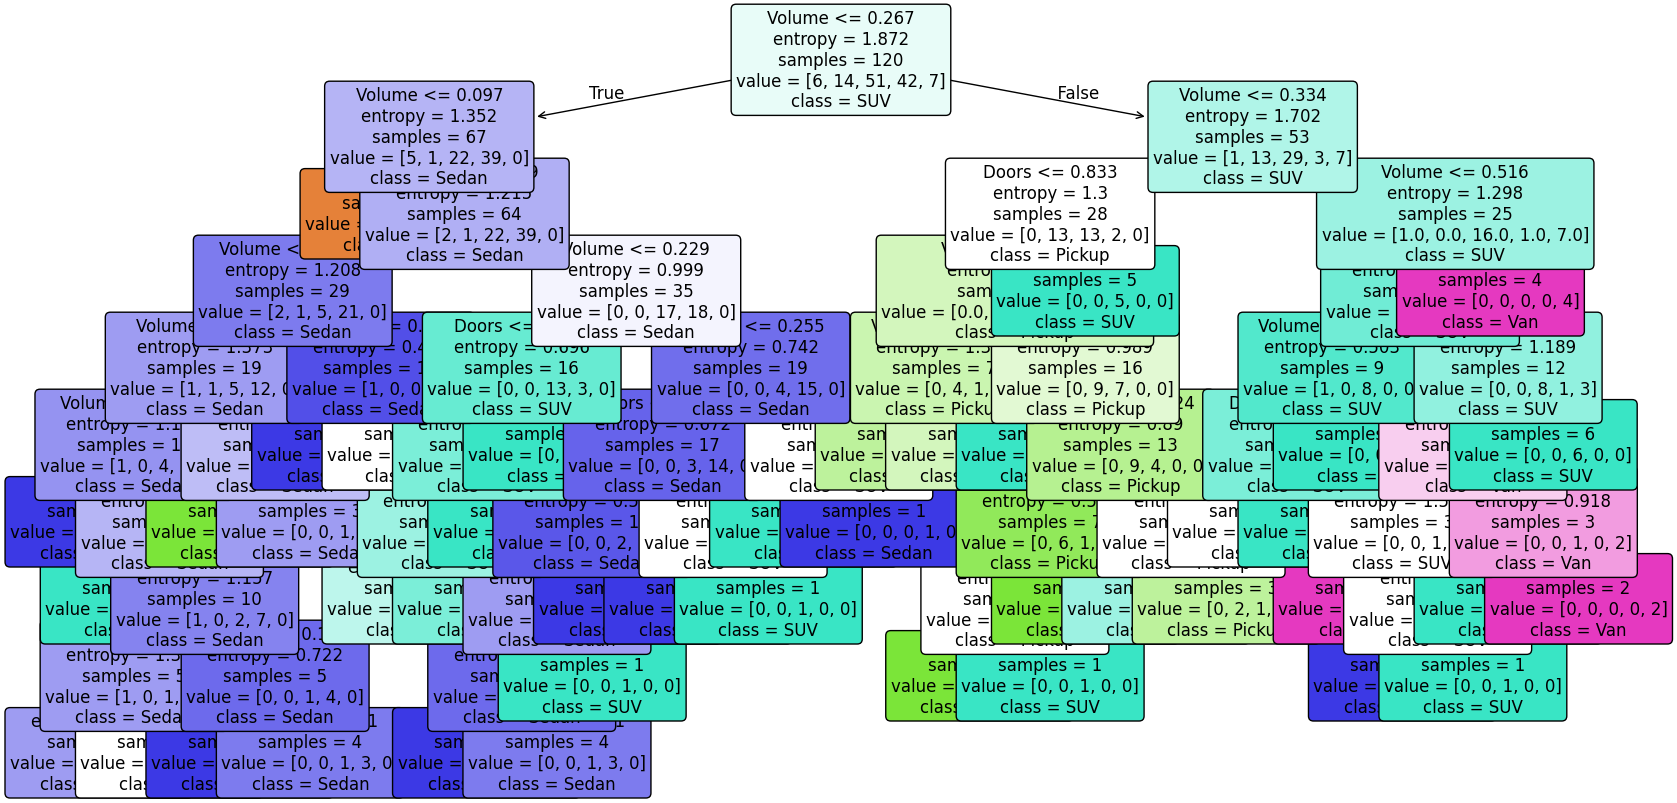

Decision Tree Processed. Final Accuracy Score: 0.5333


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

def load_and_preprocess_cars(file_path):
    """
    Cleans and normalizes car data to prepare for the Decision Tree.
    Removes non-ordinal features and filters out noise.
    """
    df = pd.read_csv(file_path)

    # 1. Cleaning: Remove 'Make' (non-ordinal) as per instructions
    if 'Make' in df.columns:
        df = df.drop(columns=['Make'])

    # Keep only the 5 official categories
    valid_categories = ['Sedan', 'SUV', 'Van', 'Pickup', 'Jeep']
    df = df[df['Style'].isin(valid_categories)]

    # Filter out dirty/noisy data (volumes under 50)
    df = df[df['Volume'] > 50]

    # 2. Normalization: Scale ordinal features (Volume, Doors) to 0-1
    scaler = MinMaxScaler()
    df[['Volume', 'Doors']] = scaler.fit_transform(df[['Volume', 'Doors']])

    return df

def build_car_decision_tree(df):
    """
    Splits data 80/20 and builds a Decision Tree using Entropy (Information Gain).
    Generates the required image and CSV files.
    """
    # Define features and target
    X = df[['Volume', 'Doors']]
    y = df['Style']

    # Randomly split into 80% Training and 20% Testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Classifier using 'entropy' (Information Gain) as per lecture notes
    # This matches the ID3 logic mentioned in your notes
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_classifier.fit(X_train, y_train)

    # --- REQUIREMENT: Save the decision tree in a file called TreeCars.png ---
    plt.figure(figsize=(20, 10))
    plot_tree(dt_classifier,
              feature_names=['Volume', 'Doors'],
              class_names=dt_classifier.classes_,
              filled=True,
              rounded=True,
              fontsize=12)
    plt.savefig('TreeCars.png')
    plt.show()

    # --- REQUIREMENT: Create TreeCars.csv with Predictions ---
    test_predictions = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, test_predictions)

    # Create the results dataframe for the test set
    tree_results_df = X_test.copy()
    tree_results_df['Style'] = y_test
    tree_results_df['PredictedStyle'] = test_predictions

    # --- REQUIREMENT: Add a row at the bottom that gives the accuracy ---
    # We create a dictionary to ensure the row alignment is correct
    accuracy_summary_row = pd.DataFrame([{
        'Volume': 'Final Accuracy:',
        'Doors': f"{accuracy:.4f}",
        'Style': '',
        'PredictedStyle': ''
    }])

    final_output = pd.concat([tree_results_df, accuracy_summary_row], ignore_index=True)
    final_output.to_csv('TreeCars.csv', index=False)

    print(f"Decision Tree Processed. Final Accuracy Score: {accuracy:.4f}")

# Execute
if __name__ == "__main__":
    cleaned_car_data = load_and_preprocess_cars('AllCars.csv')
    build_car_decision_tree(cleaned_car_data)